In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [6]:
def calc_std_feet(x):
    return (x - x.mean()) / x.std()

In [36]:
X_st = X.copy().astype(np.float64)

X_st[1] = calc_std_feet(X[1])
X_st[2] = calc_std_feet(X[2])
X_st[3] = calc_std_feet(X[3])


In [79]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = (W @ X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W)
        if i % (iterations / 12) == 0:
            print(i, W, err)
    return W,err
        

In [84]:
W,err = eval_model_reg2(X_st, y, iterations=1200, alpha=1e-3, lambda_=0.001)
W,err

100 [10.81977943  1.29188479  1.98326638  2.85123887] 2248.174495966113
200 [19.26820475  2.14025079  2.73257885  3.60272972] 1510.52005056178
300 [26.18241951  2.65414327  3.14578694  4.02368617] 1022.7641434294361
400 [31.84103209  2.97547956  3.36642337  4.25535143] 698.0693104166692
500 [36.47205635  3.18570474  3.47683987  4.37875637] 481.18204747799444
600 [40.26209948  3.33156577  3.52428387  4.44038363] 336.04984524294935
700 [43.36388132  3.43990014  3.53586071  4.46689313] 238.83798105676905
800 [45.90238819  3.52612135  3.5271187   4.47357128] 173.68373121426245
900 [47.97990927  3.59908764  3.50697503  4.46917888] 129.99460131981883
1000 [49.68015829  3.66389563  3.48054215  4.45873282] 100.68542522258228
1100 [51.07164682  3.72348325  3.45074946  4.44510211] 81.01293843814851
1200 [52.2104449   3.77954947  3.41927386  4.42992361] 67.80021071466908


(array([52.2104449 ,  3.77954947,  3.41927386,  4.42992361]),
 67.80021071466908)

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). 

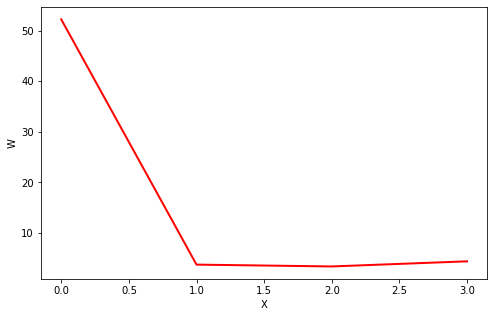

In [86]:

plt.figure(figsize=(8, 5))
plt.plot(W,linewidth=2.0, color='r')
plt.xlabel('X')
plt.ylabel('W')
plt.show()


2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию? 

In [64]:
X_norm_st = X.copy().astype(np.float64)

# нормализация
X_norm_st[3] = (X[3] - X[3].min()) / (X[3].max() - X[3].min())
print(X_norm_st[3])
# стандартизация
X_norm_st[3] = (X_norm_st[3] - X_norm_st[3].mean()) / X_norm_st[3].std()
print(X_norm_st[3])
# результаты стандартизации 
X_norm_st[3].mean(), X_norm_st[3].std()

# Можно применять к одному признаку нормализацию и стандартизацию. Но результат не меняеться.

[0.  0.  0.5 0.  0.5 0.  1.  1.  0.  0.5]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


(8.326672684688674e-17, 1.0)

3.Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [49]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = (W @ X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.abs(W))
        if i % (iterations / 12) == 0:
            print(i, W, err)
    return W

In [50]:
eval_model_reg1(X_st, y, iterations=1200, alpha=1e-3, lambda_=0.001)

100 [10.82031926  1.29192036  1.98337578  2.85143449] 2248.1216398060124
200 [19.270033    2.14036214  2.73282431  3.60314606] 1510.3771525228124
300 [26.18599516  2.6543227   3.14614835  4.02430243] 1022.5379422660177
400 [31.84660498  2.97570669  3.3668683   4.25613478] 697.7823588689172
500 [36.47972801  3.18595996  3.47733713  4.37967533] 480.85963084927096
600 [40.27186873  3.33183446  3.52480779  4.44141226] 335.7142303148755
700 [43.37567823  3.44017314  3.53639156  4.46801143] 238.5064123951738
800 [45.91609908  3.526394    3.5276418   4.47476426] 173.36828293358906
900 [47.99539491  3.59935867  3.5074795   4.47043543] 129.7028508590479
1000 [49.69726691  3.66416608  3.48101986  4.46004461] 100.42139697610136
1100 [51.09022326  3.7237557   3.45119422  4.44646274] 80.77804128868218
1200 [52.23033684  3.77982739  3.41968079  4.43132808] 67.59404890866595


array([52.23033684,  3.77982739,  3.41968079,  4.43132808])